<a href="https://colab.research.google.com/github/GunduSriBhanu/SriBhanu_DATA606/blob/main/src/Eda_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing libraries for pandas profiling to print and for machine learning tool

In [1]:
!pip install pandas-profiling
!pip install pycaret
from pycaret.regression import *
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries for data anlysis and data visualization

In [2]:
# Data Analysis
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os

## Exploratory Data Analysis

## Data Loading

Data after preparation is stored into .csv file, which is merged and the merged file is read from pandas csv for further analysis and data visualization.

In [3]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/GunduSriBhanu/SriBhanu_DATA606/main/data/uci_heart_data.csv")
df_heart.shape

(900, 16)

First five rows

In [4]:
df_heart.head()

Unnamed: 0   age  sex  chest_pain_type  resting blood pressure  \
0           0  63.0  1.0              1.0                   145.0   
1           1  67.0  1.0              4.0                   160.0   
2           2  67.0  1.0              4.0                   120.0   
3           3  37.0  1.0              3.0                   130.0   
4           4  41.0  0.0              2.0                   130.0   

   cholestoral  fasting_blood_sugar  ekg_results  max_hr  exercise_angina  \
0        233.0                  1.0          2.0   150.0              0.0   
1        286.0                  0.0          2.0   108.0              1.0   
2        229.0                  0.0          2.0   129.0              1.0   
3        250.0                  0.0          0.0   187.0              0.0   
4        204.0                  0.0          2.0   172.0              0.0   

   ST_depression  slope_of_st  vessels  thallium  heart_disease    country  
0            2.3          3.0      0.0       6.0              0  Cleveland  
1            1.5          2.0      3.0       3.0              2  Cleveland  
2            2.6          2.0      2.0       7.0              1  Cleveland  
3            3.5          3.0      0.0       3.0              0  Cleveland  
4            1.4          1.0      0.0       3.0              0  Cleveland

Last five rows

In [5]:
df_heart.tail()

Unnamed: 0   age  sex  chest_pain_type  resting blood pressure  \
895         895  52.0  1.0              4.0                   160.0   
896         896  54.0  0.0              3.0                   130.0   
897         897  56.0  1.0              4.0                   155.0   
898         898  58.0  0.0              2.0                   180.0   
899         899  65.0  1.0              4.0                   130.0   

     cholestoral  fasting_blood_sugar  ekg_results  max_hr  exercise_angina  \
895        331.0                  0.0          0.0    94.0              1.0   
896        294.0                  0.0          1.0   100.0              1.0   
897        342.0                  1.0          0.0   150.0              1.0   
898        393.0                  0.0          0.0   110.0              1.0   
899        275.0                  0.0          1.0   115.0              1.0   

     ST_depression  slope_of_st  vessels  thallium  heart_disease  country  
895            2.5          1.0      0.0       3.0              1  Hungary  
896            0.0          2.0      0.0       3.0              1  Hungary  
897            3.0          2.0      0.0       3.0              1  Hungary  
898            1.0          2.0      0.0       7.0              1  Hungary  
899            1.0          2.0      0.0       3.0              1  Hungary

### Summary of Statistics

In [6]:
df_heart.describe()

Unnamed: 0         age         sex  chest_pain_type  \
count  900.000000  900.000000  900.000000       900.000000   
mean   449.500000   52.278889    0.694444         3.101111   
std    259.951919    9.187274    0.460898         0.964209   
min      0.000000   28.000000    0.000000         1.000000   
25%    224.750000   45.000000    0.000000         2.000000   
50%    449.500000   53.000000    1.000000         3.000000   
75%    674.250000   59.000000    1.000000         4.000000   
max    899.000000   77.000000    1.000000         4.000000   

       resting blood pressure  cholestoral  fasting_blood_sugar  ekg_results  \
count               900.00000   900.000000           900.000000   900.000000   
mean                131.98109   247.977195             0.122222     0.737778   
std                  17.58408    56.387440             0.327724     0.930341   
min                  92.00000    85.000000             0.000000     0.000000   
25%                 120.00000   211.000000             0.000000     0.000000   
50%                 130.00000   243.500000             0.000000     0.000000   
75%                 140.00000   276.000000             0.000000     2.000000   
max                 200.00000   603.000000             1.000000     2.000000   

           max_hr  exercise_angina  ST_depression  slope_of_st     vessels  \
count  900.000000       900.000000     900.000000   900.000000  900.000000   
mean   146.192436         0.318889       0.891444     1.507778    0.446667   
std     23.588654         0.466305       1.104589     0.588115    0.826723   
min     71.000000         0.000000       0.000000     1.000000    0.000000   
25%    130.000000         0.000000       0.000000     1.000000    0.000000   
50%    150.000000         0.000000       0.500000     1.000000    0.000000   
75%    163.000000         1.000000       1.500000     2.000000    1.000000   
max    202.000000         1.000000       6.200000     3.000000    3.000000   

         thallium  heart_disease  
count  900.000000     900.000000  
mean     4.242222       0.748889  
std      1.809994       1.078276  
min      3.000000       0.000000  
25%      3.000000       0.000000  
50%      3.000000       0.000000  
75%      7.000000       1.000000  
max      7.000000       4.000000

#### Assigning datatypes based on the analysis of categories and numerical.
From my observation, these columns must be object data types( categorical features):

**Categorical datatypes are:**

sex

chest_pain_type

ekg_results 

exercise_angina

slope_of_st

thallium

heart_disease

**Numerical datatypes are:**

age 

resting blood pressure

cholestoral

fasting_blood_sugar

max_hr

ST_depression

vessels


In [7]:
# Categorical columns assigned
categorical_columns = ['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']
# Numerical columns assigned
numerical_columns = ['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']

### Data types conversion

In [8]:
# Converting to numerical data type
df_heart[numerical_columns] = df_heart[numerical_columns].apply(pd.to_numeric)
# Converted to categorical object data type
for i in categorical_columns:
  df_heart[i] = df_heart[i].astype(str)
print(df_heart.dtypes)

Unnamed: 0                  int64
age                       float64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
country                    object
dtype: object


Removing unnecessary column

In [9]:
df_heart = df_heart.drop(columns=['Unnamed: 0'])

Replacing categorical column data with hard code values for analysis and visualization.

In [10]:
# 'sex','chest_pain_type','ekg_results','exercise_angina','slope_of_st','thallium','heart_disease','vessels'
df_heart['sex'] = df_heart['sex'].replace({'0':'Female', '1':'Male','0.0':'Female', '1.0':'Male'})
df_heart['chest_pain_type'] = df_heart['chest_pain_type'].replace({'1':'Typical_Angina','2':'Atypical_Angina','3':'Non_Anginal','4':'Asymptomatic_Bp','1.0':'Typical_Angina','2.0':'Atypical_Angina','3.0':'Non_Anginal','4.0':'Asymptomatic_Bp'})
df_heart['exercise_angina'] = df_heart['exercise_angina'].replace({'0':'Yes', '1':'No', '0.0':'Yes', '1.0':'No'})
df_heart['fasting_blood_sugar'] = df_heart['fasting_blood_sugar'].replace({'0':'Present', '1':'Absent', '0.0':'Present', '1.0':'Absent'})
df_heart['ekg_results'] = df_heart['ekg_results'].replace({'0.0':'Normal', '1.0' : 'Abnormal', '2.0':'Probable','0':'Normal', '1' : 'Abnormal', '2':'Probable'})
df_heart['slope_of_st'] = df_heart['slope_of_st'].replace({'1.0' : 'Upsloping', '2.0' :'Flat', '3.0' : 'Downsloping','1' : 'Upsloping', '2' :'Flat', '3' : 'Downsloping'})
df_heart['thallium'] = df_heart['thallium'].replace({'3.0':'Normal','6.0' :'Fixed_Defect', '7.0' : 'Reversable_Defect','3':'Normal','6' :'Fixed_Defect', '7' : 'Reversable_Defect'})
df_heart['heart_disease'] = df_heart['heart_disease'].replace({'0':'Absence', '1' : 'Presence', '2' : 'Presence', '3' : 'Presence', '4' : 'Presence'})

Printing first five rows after replacing

In [11]:
df_heart.head()

age     sex  chest_pain_type  resting blood pressure  cholestoral  \
0  63.0    Male   Typical_Angina                   145.0        233.0   
1  67.0    Male  Asymptomatic_Bp                   160.0        286.0   
2  67.0    Male  Asymptomatic_Bp                   120.0        229.0   
3  37.0    Male      Non_Anginal                   130.0        250.0   
4  41.0  Female  Atypical_Angina                   130.0        204.0   

  fasting_blood_sugar ekg_results  max_hr exercise_angina  ST_depression  \
0              Absent    Probable   150.0             Yes            2.3   
1             Present    Probable   108.0              No            1.5   
2             Present    Probable   129.0              No            2.6   
3             Present      Normal   187.0             Yes            3.5   
4             Present    Probable   172.0             Yes            1.4   

   slope_of_st  vessels           thallium heart_disease    country  
0  Downsloping      0.0       Fixed_Defect       Absence  Cleveland  
1         Flat      3.0             Normal      Presence  Cleveland  
2         Flat      2.0  Reversable_Defect      Presence  Cleveland  
3  Downsloping      0.0             Normal       Absence  Cleveland  
4    Upsloping      0.0             Normal       Absence  Cleveland

Printing last five rows after replacing

In [12]:
df_heart.tail()

age     sex  chest_pain_type  resting blood pressure  cholestoral  \
895  52.0    Male  Asymptomatic_Bp                   160.0        331.0   
896  54.0  Female      Non_Anginal                   130.0        294.0   
897  56.0    Male  Asymptomatic_Bp                   155.0        342.0   
898  58.0  Female  Atypical_Angina                   180.0        393.0   
899  65.0    Male  Asymptomatic_Bp                   130.0        275.0   

    fasting_blood_sugar ekg_results  max_hr exercise_angina  ST_depression  \
895             Present      Normal    94.0              No            2.5   
896             Present    Abnormal   100.0              No            0.0   
897              Absent      Normal   150.0              No            3.0   
898             Present      Normal   110.0              No            1.0   
899             Present    Abnormal   115.0              No            1.0   

    slope_of_st  vessels           thallium heart_disease  country  
895   Upsloping      0.0             Normal      Presence  Hungary  
896        Flat      0.0             Normal      Presence  Hungary  
897        Flat      0.0             Normal      Presence  Hungary  
898        Flat      0.0  Reversable_Defect      Presence  Hungary  
899        Flat      0.0             Normal      Presence  Hungary

### Checking Outliers

In [13]:
numerical_columns = list(df_heart.loc[:,['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']])
categorical_columns = list(df_heart.loc[:,['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']])

From the data, ST_depression and vessels are highly skewed.

## Duplicated values

In [14]:
# Duplicate values number
df_heart.duplicated().sum()

1

In [15]:
# Printing duplicate values in a dataset
df_heart[df_heart.duplicated()]

age     sex  chest_pain_type  resting blood pressure  cholestoral  \
708  49.0  Female  Atypical_Angina                   110.0   247.977195   

    fasting_blood_sugar ekg_results  max_hr exercise_angina  ST_depression  \
708             Present      Normal   160.0             Yes            0.0   

    slope_of_st  vessels thallium heart_disease  country  
708   Upsloping      0.0   Normal       Absence  Hungary

In [16]:
# Dropping duplicates
df_heart = df_heart.drop_duplicates()
df_heart.shape

(899, 15)

One row is duplicated and removed.

### Note:
Missing values imputation is done in Feature processing

In [17]:
def Missing_values(df):
    #Finding null values from the dataframe
    null_values = df.isnull().sum().sort_values(ascending=False)
    #Finding null values percentage from the dataframe
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    #concating across columns
    null_values = pd.concat([null_values, null_percent], axis=1, keys=['Missing_values', '% Missing_values'])
    return null_values

Missing_values(df_heart)


Missing_values  % Missing_values
age                                  0               0.0
sex                                  0               0.0
chest_pain_type                      0               0.0
resting blood pressure               0               0.0
cholestoral                          0               0.0
fasting_blood_sugar                  0               0.0
ekg_results                          0               0.0
max_hr                               0               0.0
exercise_angina                      0               0.0
ST_depression                        0               0.0
slope_of_st                          0               0.0
vessels                              0               0.0
thallium                             0               0.0
heart_disease                        0               0.0
country                              0               0.0

## Statastical distribution

In [18]:
#check data description
df_heart.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

Correlation of a data frame

In [19]:
df_heart.corr()

age  resting blood pressure  cholestoral  \
age                     1.000000                0.248212     0.143500   
resting blood pressure  0.248212                1.000000     0.111340   
cholestoral             0.143500                0.111340     1.000000   
max_hr                 -0.309138               -0.094044    -0.054176   
ST_depression           0.246975                0.183448     0.057174   
vessels                 0.399967                0.064477     0.073963   

                          max_hr  ST_depression   vessels  
age                    -0.309138       0.246975  0.399967  
resting blood pressure -0.094044       0.183448  0.064477  
cholestoral            -0.054176       0.057174  0.073963  
max_hr                  1.000000      -0.274864 -0.117040  
ST_depression          -0.274864       1.000000  0.312532  
vessels                -0.117040       0.312532  1.000000

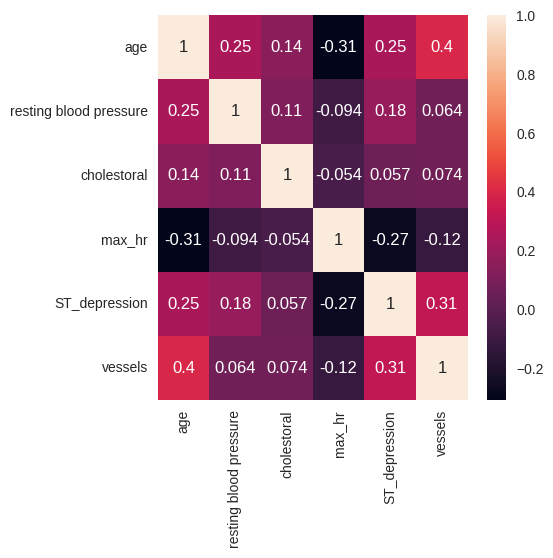

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(df_heart.corr(),annot=True)
plt.show()

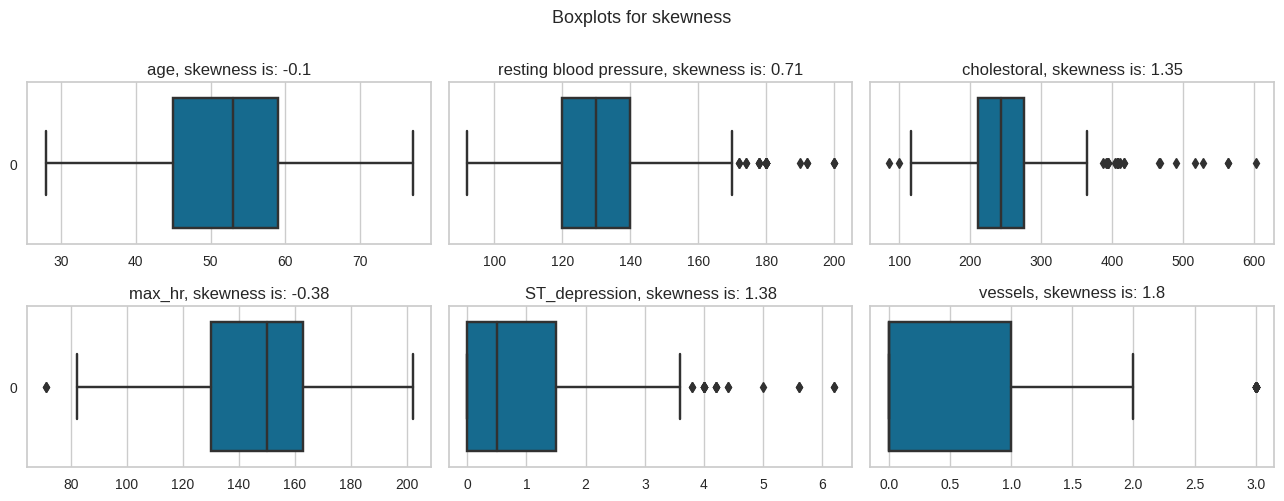

In [21]:
#Representing plots for finding outliers and skewness in the columns
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=13)
    axs = axs.flatten()
    # enumerating all the data in columns
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
#Plotting with box plots and printing its skewness in the data.        
boxplots_custom(dataset=df_heart, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for skewness')
plt.tight_layout()


Finding the IQR for the data and 

In [22]:
# define continuous variable & plot
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_eda.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
        

outliers(df_heart[numerical_columns])

For the feature age, No of Outliers is 0
For the feature resting blood pressure, No of Outliers is 26
For the feature cholestoral, No of Outliers is 24
For the feature max_hr, No of Outliers is 2
For the feature ST_depression, No of Outliers is 20
For the feature vessels, No of Outliers is 40


In [23]:
# Fill the values if any null values exist
df_eda = df_heart.fillna(df_heart.mean())
df_eda.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting blood pressure    0
cholestoral               0
fasting_blood_sugar       0
ekg_results               0
max_hr                    0
exercise_angina           0
ST_depression             0
slope_of_st               0
vessels                   0
thallium                  0
heart_disease             0
country                   0
dtype: int64

### Profiling Report:
This report provides the information of all the variables, correlation using pearson of all the columns and their relations

In [24]:
profile_report = ProfileReport(df_eda)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights from Profiling Report:

1. Most of the patients in the data are between ages from 50 to 60 years.
2. Most of the patients in dataset are of Males with 625 and females of 274 count.
3. Chest pain type is of mostly Asymptomatic BP of 411 count, followed by other pain types.
4. Resting blood pressure among the patients is uniformly distributed with more patients in range of 120 to 140.
5. Cholosterol is uniformly distributed with highest count between 200 to 300.
6. The data shows that most of the patients in data are suffering from fasting blood sugar with count of 789.
7. Most of the ekg_results in patients are Normal.
8. Max_hr is between 125 to 175 for most of the patients in data.
9. exercise_angina is of count 612 among the patients.
10. ST_depression is more in number between the range of 0 to 2.
11. Upsloping in slope_of_st is highest with count of 485 in the data, while the lowest is downsloping with 43 in count.
12. Majority of the patients had vessels of 0 with count of 653.
13. The patients in the data had more with Normal thallium of 608 count.
14. The data provides more of data with absence in heart disease of 515 count.

With Pycaret, provide machine learning data

In [25]:
report = setup(data = df_eda, target = 'heart_disease', session_id=123)

This pycaret analysis, helps in analysing the models for machine learning and imputation to perform on the data for modeling.

## Data Visulaization:



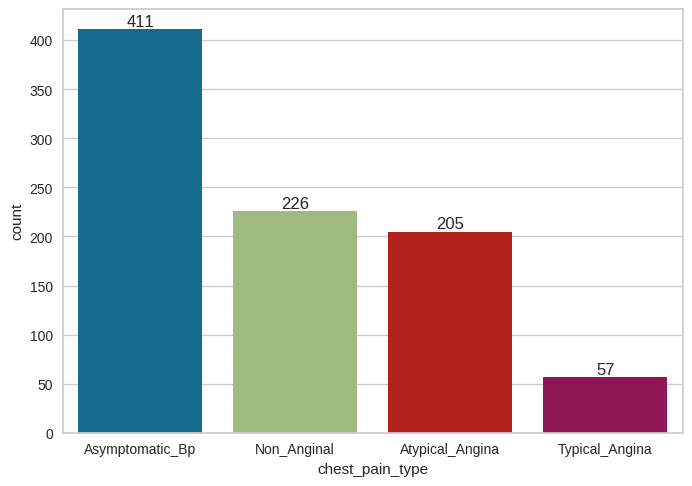

In [26]:
# Seaborn counter plot for finding the most pain types in the data
ax=sns.countplot(data=df_eda, x='chest_pain_type',order = df_eda['chest_pain_type'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()


Seaborn plot for further finding the data with chest pain type in the patients with heart failure or heart disease presence.

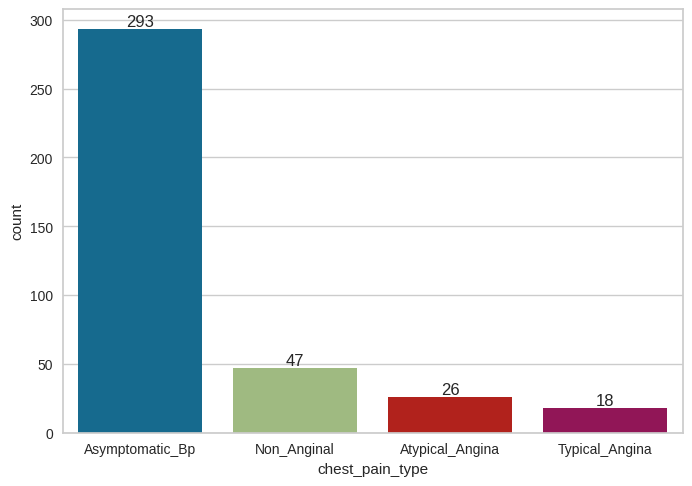

In [27]:
#Seaborn plot for finding the majority chest pain type in heart failure disease presence.
ax=sns.countplot(data=df_eda.query('heart_disease == "Presence"'), x='chest_pain_type',order = df_eda['chest_pain_type'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [28]:
#dropping if any non null values exists for performing data visualization
df_vis = df_eda.dropna()
df_vis = df_vis.query("cholestoral>=200 and heart_disease=='Presence'")

### Profiling report for Heart Failure Presence.

In [29]:
profile_report = ProfileReport(df_vis)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights from Profiling Report of heart failure presence and with highest Cholosterol problems:
1. Most of the patients in the data are between ages from 50 to 60 years.
2. Most of the patients in dataset are of Males with 274 and females of 57 count.
3. Chest pain type is of mostly Asymptomatic BP of 251 count, followed by other pain types.
4. Resting blood pressure among the patients is uniformly distributed with more patients in range of 120 to 140.
5. Cholosterol is uniformly distributed with highest count between 200 to 300.
6. The data shows that most of the patients in data are suffering from fasting blood sugar with count of 278.
7. Most of the ekg_results in patients are Normal.
8. Max_hr is between 125 to 175 for most of the patients in data.
9. exercise_angina is of count 194 with False among the patients.
10. ST_depression is more in number between the range of 0 to 2.
11. Flat in slope_of_st is highest with count of 485 in the data, while the lowest is downsloping with 19 in count.
12. Majority of the patients had vessels of 0 with count of 171.
13. The patients in the data had more with Normal Reversable of 159 count.


Visualizing the data with the presence of blood sugar and cholesterol in the data.

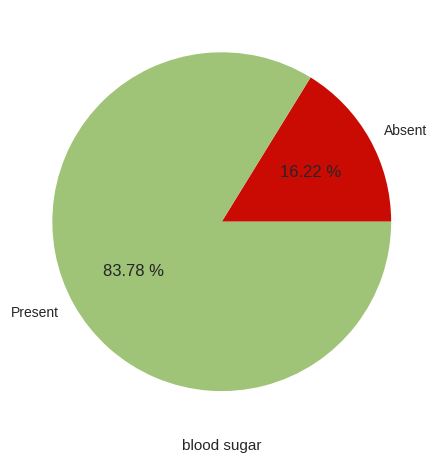

In [30]:
fbs_vis=df_vis.groupby(by="fasting_blood_sugar")[["cholestoral"]].sum()
fbs=fbs_vis.reset_index()
plt.pie(x="cholestoral",labels="fasting_blood_sugar", data=fbs, autopct="%.2f %%",colors=["r","g","b"])
plt.xlabel("blood sugar")
plt.show()

Patient with cholesterol of 83.78% had the presence of blood sugar, which is the highest percentage. So, the patients with blood sugar had high chances of cholosterol problems.

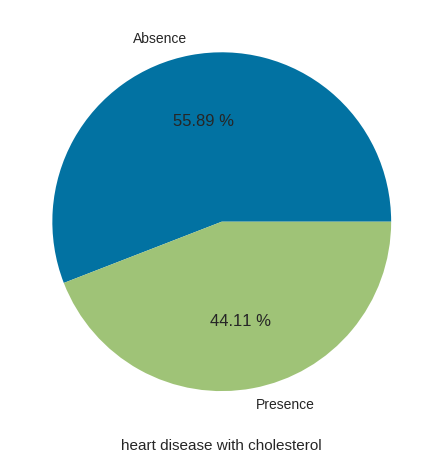

In [46]:
ch_hf=df_eda.groupby(by="heart_disease")[["cholestoral"]].sum()
chol=ch_hf.reset_index()
plt.pie(x="cholestoral",labels="heart_disease", data=chol, autopct="%.2f %%")
plt.xlabel("heart disease with cholesterol")
plt.show()

Here, patient with presence of heart failure had less number of patients with cholosterol problems.

In [32]:
# Population indicator with Region column
df_dis = df_eda.query("heart_disease=='Presence'")
df_dis = df_dis[["chest_pain_type","fasting_blood_sugar","cholestoral","resting blood pressure","sex"]]
df_dis = df_dis.query("chest_pain_type=='Asymptomatic_Bp'")
df_dis

chest_pain_type fasting_blood_sugar  cholestoral  resting blood pressure  \
1    Asymptomatic_Bp             Present        286.0                   160.0   
2    Asymptomatic_Bp             Present        229.0                   120.0   
6    Asymptomatic_Bp             Present        268.0                   140.0   
8    Asymptomatic_Bp             Present        254.0                   130.0   
9    Asymptomatic_Bp              Absent        203.0                   140.0   
..               ...                 ...          ...                     ...   
893  Asymptomatic_Bp             Present        341.0                   140.0   
894  Asymptomatic_Bp             Present        266.0                   140.0   
895  Asymptomatic_Bp             Present        331.0                   160.0   
897  Asymptomatic_Bp              Absent        342.0                   155.0   
899  Asymptomatic_Bp             Present        275.0                   130.0   

        sex  
1      Male  
2      Male  
6    Female  
8      Male  
9      Male  
..      ...  
893    Male  
894    Male  
895    Male  
897    Male  
899    Male  

[293 rows x 5 columns]

In [33]:
df_val = df_dis.query("fasting_blood_sugar=='Present'")
df_val = df_val[["fasting_blood_sugar","cholestoral","resting blood pressure","sex"]]
df_val

fasting_blood_sugar  cholestoral  resting blood pressure     sex
1               Present        286.0                   160.0    Male
2               Present        229.0                   120.0    Male
6               Present        268.0                   140.0  Female
8               Present        254.0                   130.0    Male
24              Present        206.0                   130.0    Male
..                  ...          ...                     ...     ...
892             Present        231.0                   140.0    Male
893             Present        341.0                   140.0    Male
894             Present        266.0                   140.0    Male
895             Present        331.0                   160.0    Male
899             Present        275.0                   130.0    Male

[250 rows x 4 columns]

In [34]:
print("Minimum Value of Cholestoral with blood sugar and heart disease presence ",df_val.groupby(['sex'])['cholestoral'].min(),"\n Maximum Value of Cholestoral with blood sugar and heart disease presence ",df_val.groupby(['sex'])['cholestoral'].max())

Minimum Value of Cholestoral with blood sugar and heart disease presence  sex
Female    164.0
Male      117.0
Name: cholestoral, dtype: float64 
 Maximum Value of Cholestoral with blood sugar and heart disease presence  sex
Female    409.0
Male      529.0
Name: cholestoral, dtype: float64


From the data, observed that the females had cholosterol levels ranging from 164 to 409 and in males is from 117.0 to 409.0 in the patients suffering from heart failures.

In [35]:
print("Minimum Value of resting blood pressure with blood sugar and heart disease presence ",df_val.groupby(['sex'])['resting blood pressure'].min(),"\n Maximum Value of resting blood pressure with blood sugar and heart disease presence ",df_val.groupby(['sex'])['resting blood pressure'].max())

Minimum Value of resting blood pressure with blood sugar and heart disease presence  sex
Female    100.0
Male       92.0
Name: resting blood pressure, dtype: float64 
 Maximum Value of resting blood pressure with blood sugar and heart disease presence  sex
Female    180.0
Male      200.0
Name: resting blood pressure, dtype: float64


From the data, observed that the females had cholosterol levels ranging from 100.0 to 180.0 and in males is from 92.0 to 200.0 in the patients suffering from heart failures.

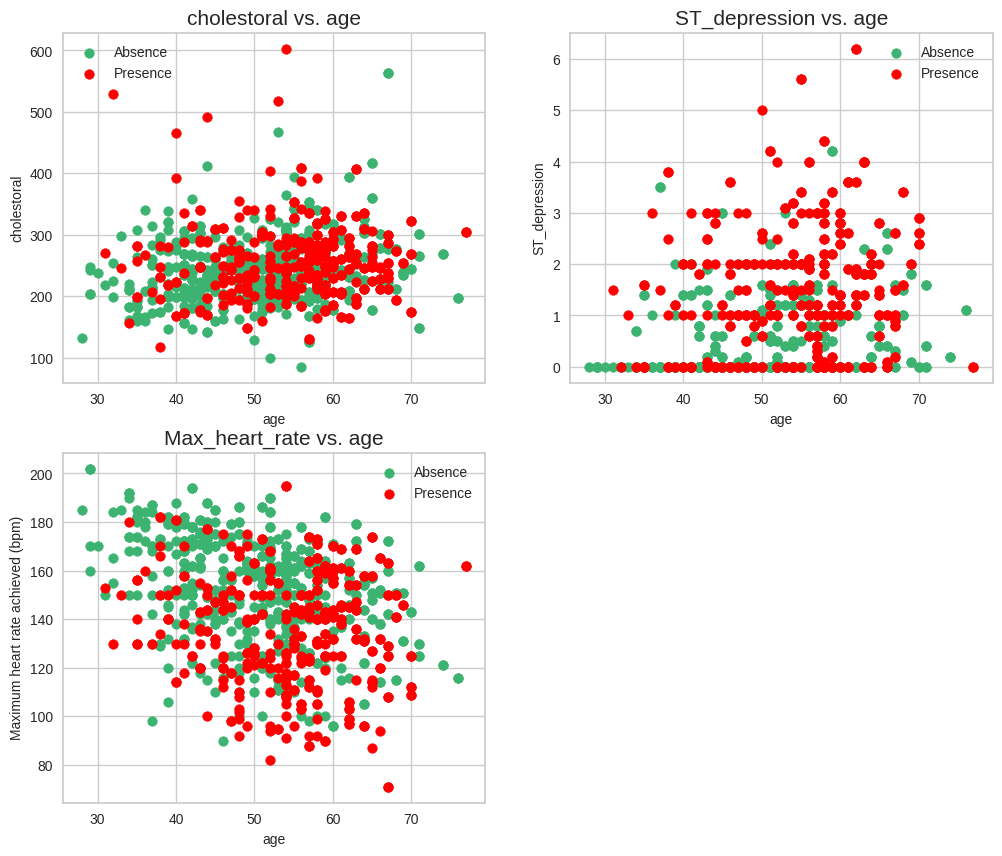

In [36]:
def features_with_age(data): 
    """
    Effects of features for heart disease by age
    """
    Absence = data.heart_disease=='Absence'
    Presence = data.heart_disease=='Presence'
    
    age_Absence = data.age[Absence]
    age_Presence = data.age[Presence]
    
    
    b_color = 'MediumSeaGreen'
    m_color = 'Red'
    
    fig = plt.figure(figsize=(12, 10))

    # Cholestrol 
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_Absence, y=data.cholestoral[Absence],color=b_color)
    plt.scatter(x=age_Presence, y=data.cholestoral[Presence], color=m_color)
    plt.title('cholestoral vs. age', fontsize=15)
    plt.legend(['Absence', 'Presence'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('cholestoral', fontsize=10) 

    # ST_depression
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_Absence, y=data.ST_depression[Absence], color=b_color)
    plt.scatter(x=age_Presence, y=data.ST_depression[Presence], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Absence', 'Presence'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)  

    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_Absence, y=data.max_hr[Absence], color=b_color)
    plt.scatter(x=age_Presence, y=data.max_hr[Presence], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Absence', 'Presence'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)

features_with_age(df_eda);

From all the observations, the age between 50 and 60, is more prone to the issues of Cholosterol, maximum heart rate problems among the patients in the countries Cleveland, Hungary and Switzerland.

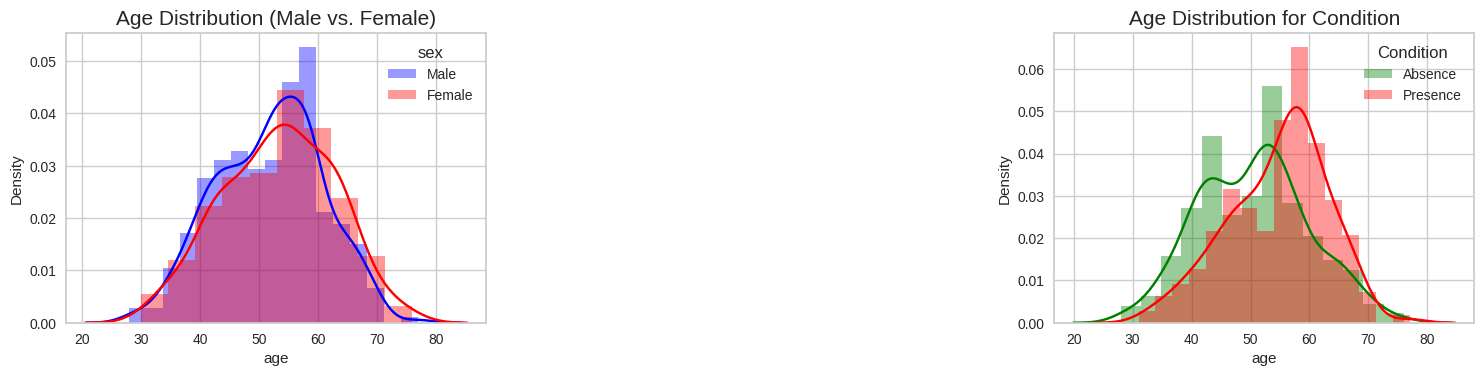

In [37]:
def age_gender_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution for sex
    plt.subplot(2, 3, 1)
    female = df_eda[df_eda['sex']=='Female']['age']
    male = df_eda[df_eda['sex']=='Male']['age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='sex', fontsize=10)

    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    absence = df_eda[df_eda['heart_disease']=='Absence']['age']
    presence = df_eda[df_eda['heart_disease']=='Presence']['age']

    sns.distplot(absence, color='Green', label='Absence')
    sns.distplot(presence
                 , color='Red', label='Presence')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
        
    plt.tight_layout()
    plt.show()


age_gender_distribution(df_eda)


From the data, both in the amles and females between age 50 and 60 is more provided and among them in the age of 50 to 60, there are many patients.

<Figure size 1000x800 with 0 Axes>

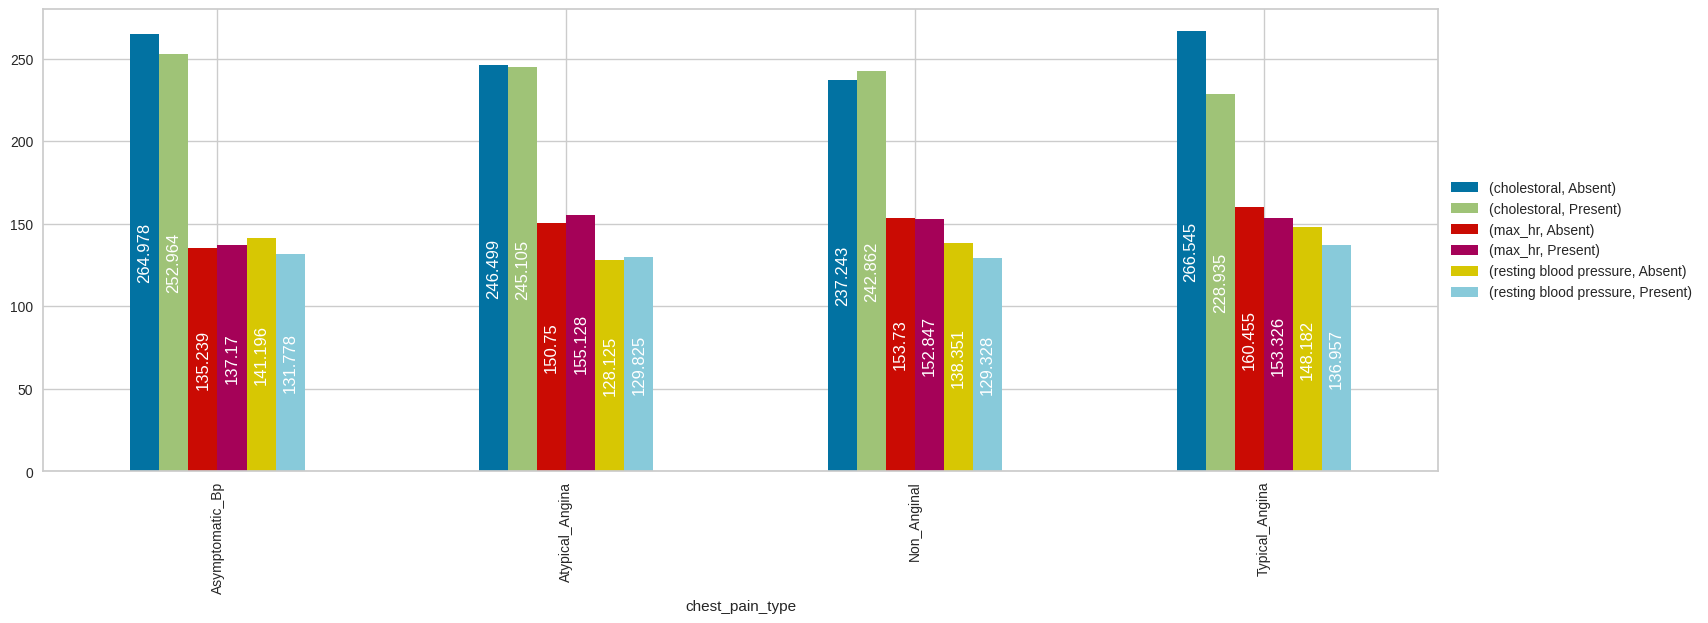

In [38]:
#Visualization for overall data
df_disease=df_eda.pivot_table(index="chest_pain_type", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
# Decreasing order of labels
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

From overall data, Asymptomatic BP is highest and with highest cholosterol present. Maximum heart rate is maximum found in Atypical Angina, and resting blood pressure problems are highest in Typical_Angina chest pain type.

<Figure size 1000x800 with 0 Axes>

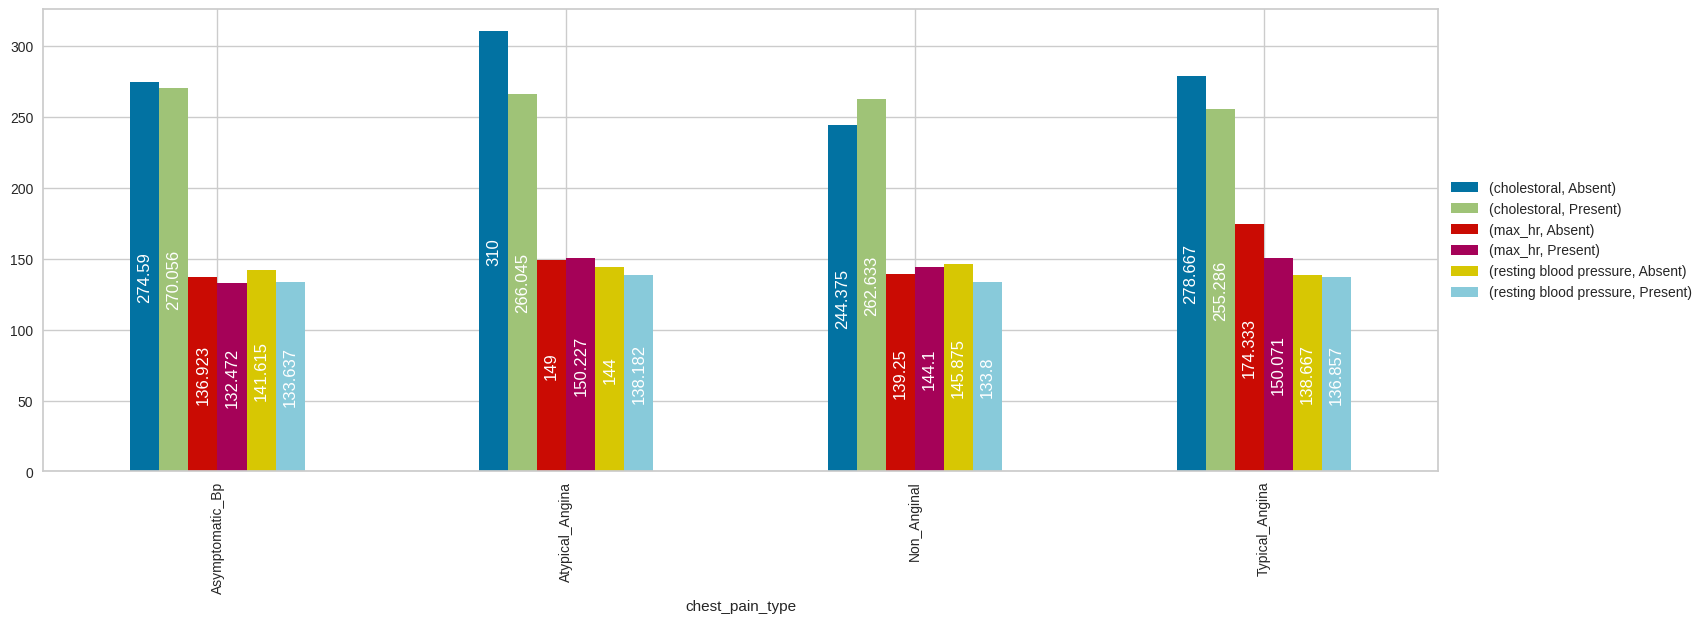

In [39]:
# Heart Failure presence for the overall data
df_disease=df_vis.pivot_table(index="chest_pain_type", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# decreasing order as per labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

From overall data of heart failures, Asymptomatic BP is highest and with highest cholosterol present. Maximum heart rate is maximum found in Atypical Angina, and resting blood pressure problems are highest in Typical_Angina chest pain type.

<Figure size 1000x800 with 0 Axes>

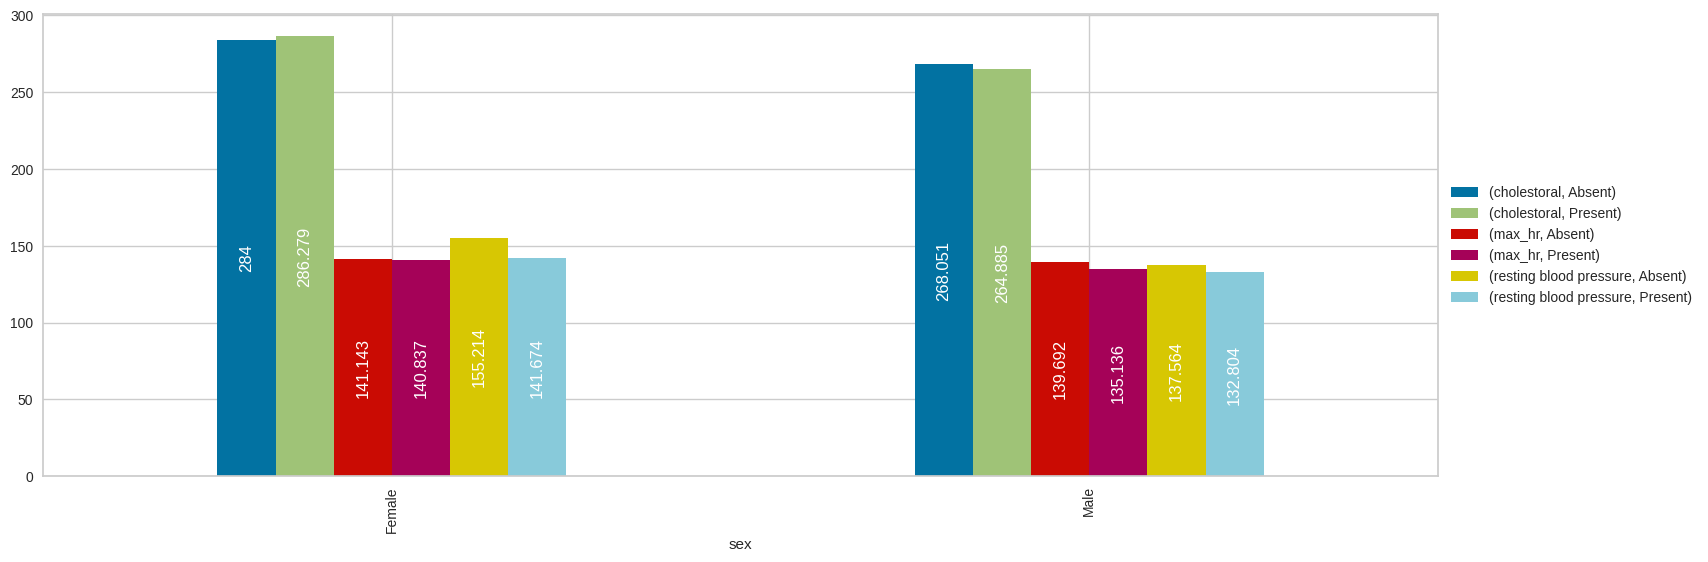

In [40]:
#Analysing the data based on fasting blood sugar
df_disease=df_vis.pivot_table(index="sex", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Decreasing order of labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

From the data of heart failures presence, Females had more in number of cases with cholosterol, maximum heart rate and resting blood pressure in comparison to males with fasting blood sugar presence.

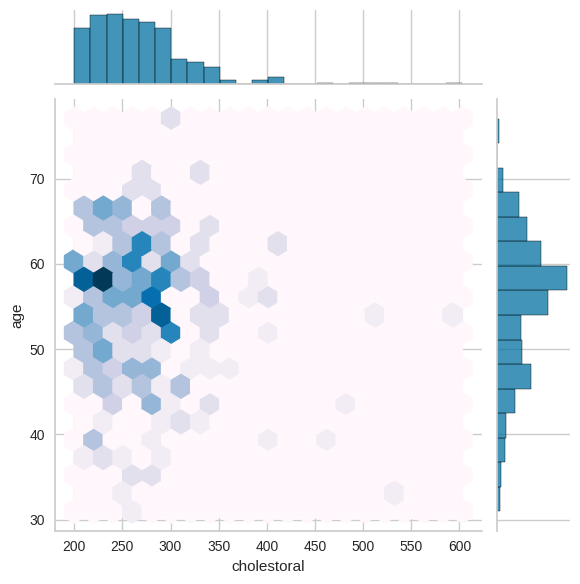

In [41]:
#Seaborn plot for Cholosterol with age
pal = sns.light_palette("blue", as_cmap=True)

sns.jointplot(data=df_vis,
              x='cholestoral',
              y='age',
              kind='hex',
              cmap='PuBu'
              )


The data shows that highest cholosterol present between 200 and 350of ages 40 to 50, when heart disease is present

Text(0, 0.5, '')

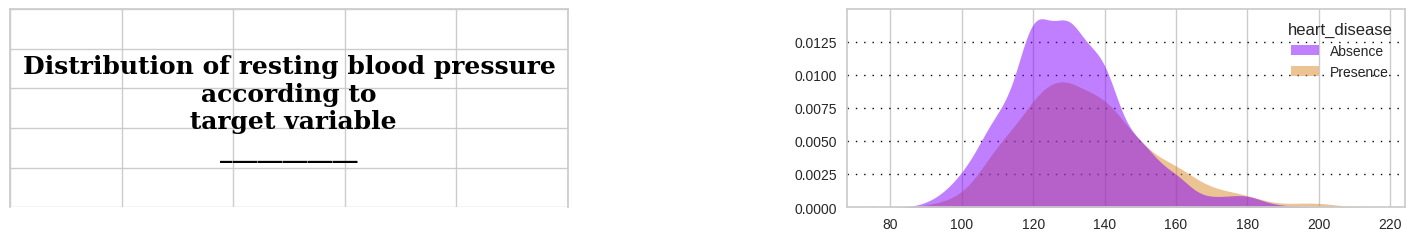

In [42]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])



# resting blood pressure title
ax1.text(0.5,0.5,"Distribution of resting blood pressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax1.spines["bottom"].set_visible(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)

# resting blood pressure
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax2, data=df_eda, x='resting blood pressure',hue="heart_disease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax2.set_xlabel("")
ax2.set_ylabel("")





From overall data, the blood pressure of more than 100 to 180 is present, among which between 120 and 140, the prone to heart disease is highest.

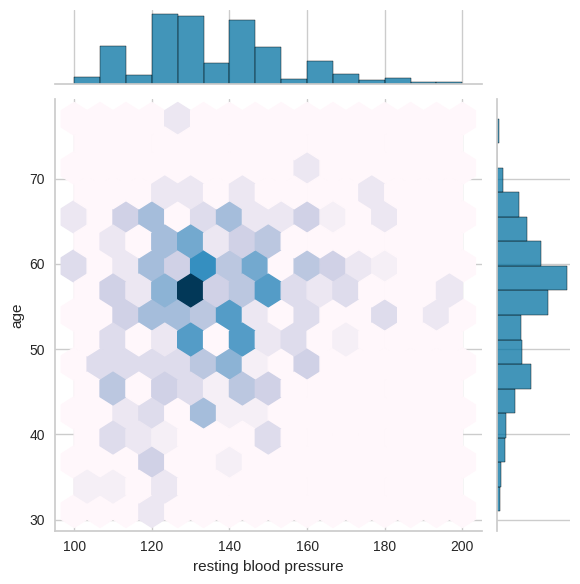

In [43]:
#Seaborn plot for the variation of resting blood pressure with age
sns.jointplot(data=df_vis,
              x='resting blood pressure',
              y='age',
              kind='hex',
              cmap='PuBu'
              )

The data shows that highest resting blood pressure present between 100 and 150 of ages 40 to 50, when heart disease is present

Text(0, 0.5, 'fasting_blood_sugar')

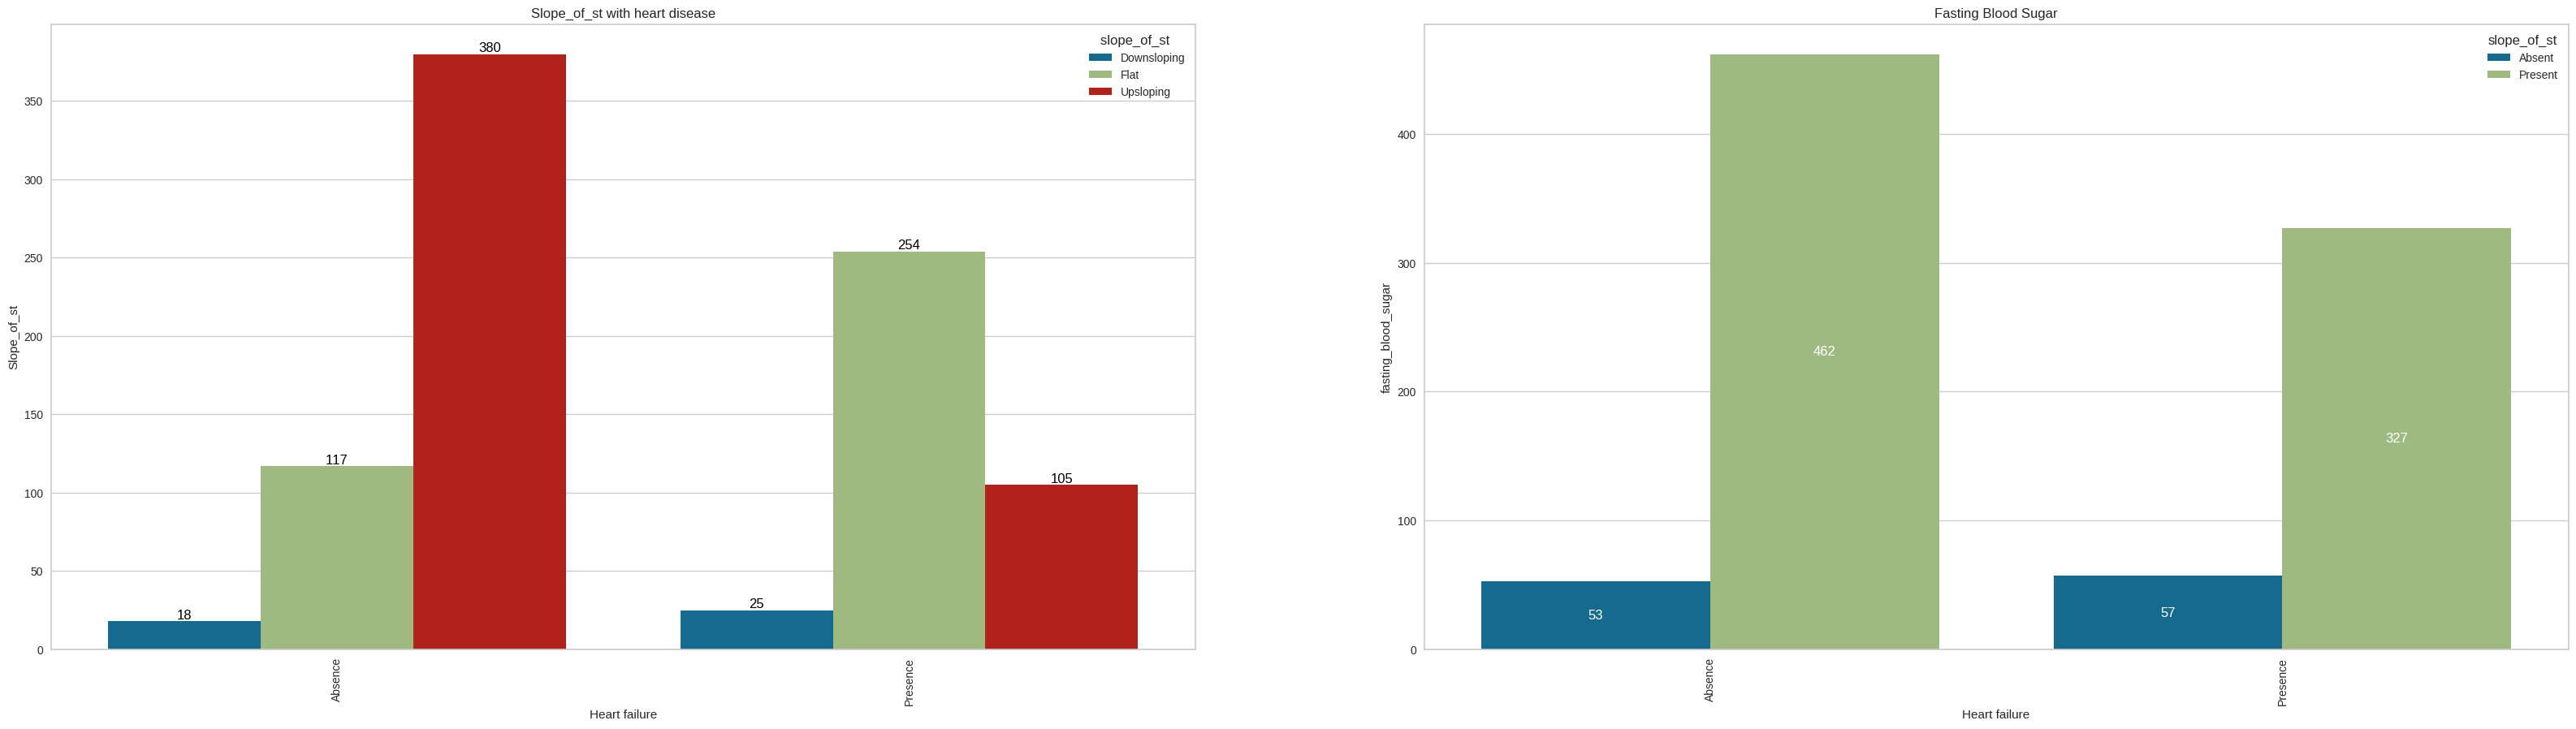

In [44]:
fig, ax = plt.subplots(1,2,figsize=(40,10))
#heart failure due to slope of st
ax1 = sns.countplot(data=df_eda,x='heart_disease', hue='slope_of_st',ax=ax[0],order = df_eda['heart_disease'].value_counts(ascending=False).index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Slope_of_st with heart disease')
ax1.legend(loc = 'upper right', title = 'slope_of_st ' )
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', color='black')
ax1.set_xlabel('Heart failure')
ax1.set_ylabel('Slope_of_st')


#heart failure due to fasting blood sugar
ax2 = sns.countplot(data=df_eda,x='heart_disease', hue='fasting_blood_sugar',ax=ax[1],order = df_eda['heart_disease'].value_counts(ascending=False).index)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_title('Fasting Blood Sugar')
ax2.legend(loc = 'upper right', title = 'slope_of_st' )
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', rotation=0, color='white')
ax2.set_xlabel('Heart failure')
ax2.set_ylabel('fasting_blood_sugar')

when the heart failure is present, the slope of st is highest for Flat.

Slope_of_st is highest among the patients, when heart disease is present.

Storing into file for Modeling.

In [45]:
df_eda.to_csv("ml_uci_heart.csv")

## Overall Summary from Insights:

From overall data of both heart diseases present and absence, observed the data contained more of patients between ages 50 to 60.

The males data is highes and most of patients contained Asymptomatic blood pressure, with resting blood pressure between 120 to 140.

The data showed highest fasting blood sugar presence and most of the ekg_results are normal.

ST_depression is in the range of 0 to 2 with slope_of_st Upsloping highest and with thallium count of 608.

From overall data of both heart diseases presence and cholosterol presence, observed the data contained more of patients between ages 50 to 60.

The males data is highes and most of patients contained Asymptomatic blood pressure, with resting blood pressure between 120 to 140.

The data showed highest fasting blood sugar presence and most of the ekg_results are normal.

ST_depression is in the range of 0 to 2 with slope_of_st Downsloping highest and with thallium count of 159 with Reversible defects.




## Conclusion:
 
 From overall data, the heart diseases observed are highest in Males after ages 50 years with cholosterol of greater than 200, presence of fasting blood sugar and resting blood pressure more than 120 with Asymptomatic Blood pressure and slope_of_st with Upsloping is highest and ST_depression between 0 to 2.

 So, it is evident that when ever a patient finds with above parameters of cholosterol greater than 200 mg, resting blood pressure greater tahn 120 with asymptomatic blood pressure and ST_depression between 0 to 2 after 50 years of age needs to take care as there are highest chances of Heart Failures or heart diseases presence.